## CosmosQA: Multiple Choice

Dataset Source: https://www.kaggle.com/datasets/zjjc123/cosmosqa

#### Import Necessary Libraries

In [1]:
import os, sys, random, ast
os.environ['TOKENIZERS_PARALLELISM']='false'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datasets
from datasets import Dataset, DatasetDict

import torch

from dataclasses import dataclass

import transformers
from transformers import AutoTokenizer, AutoModelForMultipleChoice
from transformers import Trainer, TrainingArguments, set_seed
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy

from typing import Optional, Union

pd.set_option('display.max_colwidth', None)

!git lfs install

Git LFS initialized.


#### Display Library Versions

In [2]:
print("Python:".rjust(15), sys.version[0:6])
print("NumPy:".rjust(15), np.__version__)
print("Pandas:".rjust(15), pd.__version__)
print("Torch:".rjust(15), torch.__version__)
print("Datasets:".rjust(15), datasets.__version__)
print("Transformers:".rjust(15), transformers.__version__)

        Python: 3.9.7 
         NumPy: 1.23.3
        Pandas: 1.4.4
         Torch: 1.12.1
      Datasets: 2.8.0
  Transformers: 4.26.1


#### Load & Process Training Dataset

In [3]:
parent_dir = "/Users/leedunn/Desktop/Projects_to_Train/MC"

training_file_location = os.path.join(parent_dir, "train.csv")

train_ds = pd.read_csv(training_file_location)

train_ds = train_ds.drop(columns=["id"])

train_ds.reset_index(drop=True, inplace=True)

train_ds

,context,question,answer0,answer1,answer2,answer3,label
0,"Good Old War and person L : I saw both of these bands Wednesday night , and they both blew me away . seriously . Good Old War is acoustic and makes me smile . I really can not help but be happy when I listen to them ; I think it 's the fact that they seemed so happy themselves when they played .","In the future , will this person go to see other bands play ?",None of the above choices .,"This person likes music and likes to see the show , they will see other bands play .","This person only likes Good Old War and Person L , no other bands .",Other Bands is not on tour and this person can not see them .,1
1,"I mean it : not one person said ANYTHING to me . They would have if I did something wrong , right ? But , this morning , I got a call from my guy at the temp agency and he said that I was no longer needed in that position , that I did n't need to go out there .",Why might have the temp agency tell me I am not needed at that position ?,The company hiring the temp workers might have had a change of mind .,The temp agency hiring the temp workers might have had a change of mind .,None of the above choices .,I might have had a change of mind working for the company .,0
2,Leaving my shift Thursday day shift I arrived the same time as my partner just after six that evening and before long the radio erupted in dispatch tones . A car fleeing the police has crashed and landed on its roof with four separate people entrapped inside . Our medic unit is dispatched along with multiple other ambulances and Rescue Companies .,What may have caused the radio to erupt with dispatch tones ?,My partner needed a medic unit .,Someone was running from the ambulances after they got into a wreck .,None of the above choices .,Someone was running from the cops and got into a wreck .,3
3,"So , last day in Seattle , and my flight was at 1:30 . I got to chit chat with my old manager ( more like a mentor ) , and left Seattle feeling really good and inspired . .",Why did I chit chat with my old manager ?,Because my flight was at 1:30 .,Because I left Seattle feeling really good and inspired .,Because it 's my last day in Seattle .,Because I enjoy talking to him .,3
4,"Ms. Mumma informed Mr. Dail that evidence had been found in his case . "" I fell out of my chair and burst into tears . Evidence meant I was going home , and I knew that , "" said Mr. Dail . He immediately told Ms. Mumma , "" Test anything and everything you can find .",Why did I burst into tears ?,Because Ms. Mumma was informative .,Because I had an intense emotional response to the new development .,Because Mr. Dail was informed .,Because I fell out of my chair .,1
...,...,...,...,...,...,...,...
25257,My dad in old age ... he would have been wise in some matters . Important matters of the day to day . Wise in his right - brained blueness . Wise as each white hair in his beard .,What may be a fact about their dad ?,He 's a different person now .,He died .,None of the above choices .,He does n't talk to them anymore .,1
25258,"As the house was in the higher part of the town we had the view on the lake from our window :) Again , we got ready and went to the same place where we had the "" Vin d'honneur "" to again have some drinks and snacks with other guests . Gave us some strength before we hit the road . I must say I was n't too chatty ( am I ever ?","Why might we have gone back to the same place we had the "" Vin d'honneur "" .",It 's a place I do n't have to be chatty because it 's loud .,I liked the restaurant by the river and wanted to go back .,We enjoyed the restaurant the first time around so we returned .,I like the food and it helps me sleep when we hit the road .,2
25259,"Then there 's is my baby pitbull . Not to play favorite , but he has managed to find a deeper spot in my heart . He is chocolate and carmel swirled I 'd like to say . He 's never been loud , or obnoxious , or too rowdy , or too lazy .",What is the narrator 

#### Load & Process Evaluation Dataset

In [4]:
eval_file_location = os.path.join(parent_dir, "valid.csv")

eval_ds = pd.read_csv(eval_file_location)

eval_ds = eval_ds.drop(columns=["id"])

eval_ds.reset_index(drop=True, inplace=True)

eval_ds

,context,question,answer0,answer1,answer2,answer3,label
0,"Do i need to go for a legal divorce ? I wanted to marry a woman but she is not in the same religion , so i am not concern of the marriage inside church . I will do the marriage registered with the girl who i am going to get married . But legally will there be any complication , like if the other woman comes back one day , will the girl who i am going to get married now will be in trouble or Is there any complication ?",Why is this person asking about divorce ?,If he gets married in the church he wo nt have to get a divorce .,He wants to get married to a different person .,He wants to know if he does nt like this girl can he divorce her ?,None of the above choices .,1
1,"Do i need to go for a legal divorce ? I wanted to marry a woman but she is not in the same religion , so i am not concern of the marriage inside church . I will do the marriage registered with the girl who i am going to get married . But legally will there be any complication , like if the other woman comes back one day , will the girl who i am going to get married now will be in trouble or Is there any complication ?",Why is he worried about getting married ?,He was married before and she might come back one day .,He wants the girl he is going to marry get in trouble .,He knows that he will be committing polygamy .,None of the above choices .,0
2,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may happen after the young man makes his call ?,An ambulance would likely come to the scene,The taxi would pick up the young man,None of the above choices .,The bus would arrive at the stop soon,0
3,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may happen after the young man makes his call ?,None of the above choices .,The bus would arrive at the stop soon,The taxi would pick up the young man,Medical personnel would come to help the old man,3
4,"I was walking home from the store , when I saw an old man laying on the sidewalk , bleeding . The right side of his face was all covered in blood . He was conscious but seemed dazed and probably intoxicated . Nearby there was a young man dialing his cell phone .",What may have happened to the old man ?,He was waiting on a ride,He likely fell on the sidewalk and hit his head while intoxicated,He was waiting on the taxi,None of the above choices .,1
...,...,...,...,...,...,...,...
2980,"Not going in but the antibiotic they put into the IV just kill my arm . And after the procedure was over , I was throwing up all over again . I laid in bed the rest of the afternoon with DH and felt pretty decent by tonight .",What 's a possible reason the writer was throwing up ?,They felt pretty decent by the night .,None of the above choices .,They were not going in .,They have an illness .,3
2981,"This morning was my appointment with the psychiatrist . And may I give Mike another little pat ? He had to get up at 4:25 a.m. yesterday to go into work early to accumulate hours for this day off , and then he stayed an hour and a half late , too , not getting home until 7:00 , and he 's going to have to do that twice more . That 's a high price he 's paying . Anyway , it was worth it .",What 's a possible reason the writer has an appointment with a psychiatrist ?,Because the writer may give Mike another little pat .,None of the above choices .,Because it 's in the morning .,Because Mike had to get up at 4:25 a.m. yesterday .,1
2982,"Those who do n't pass this training will have to give up their jetpack . Fortunately they 'll get their money back . Each jet

#### Visual Question Length (in Words)

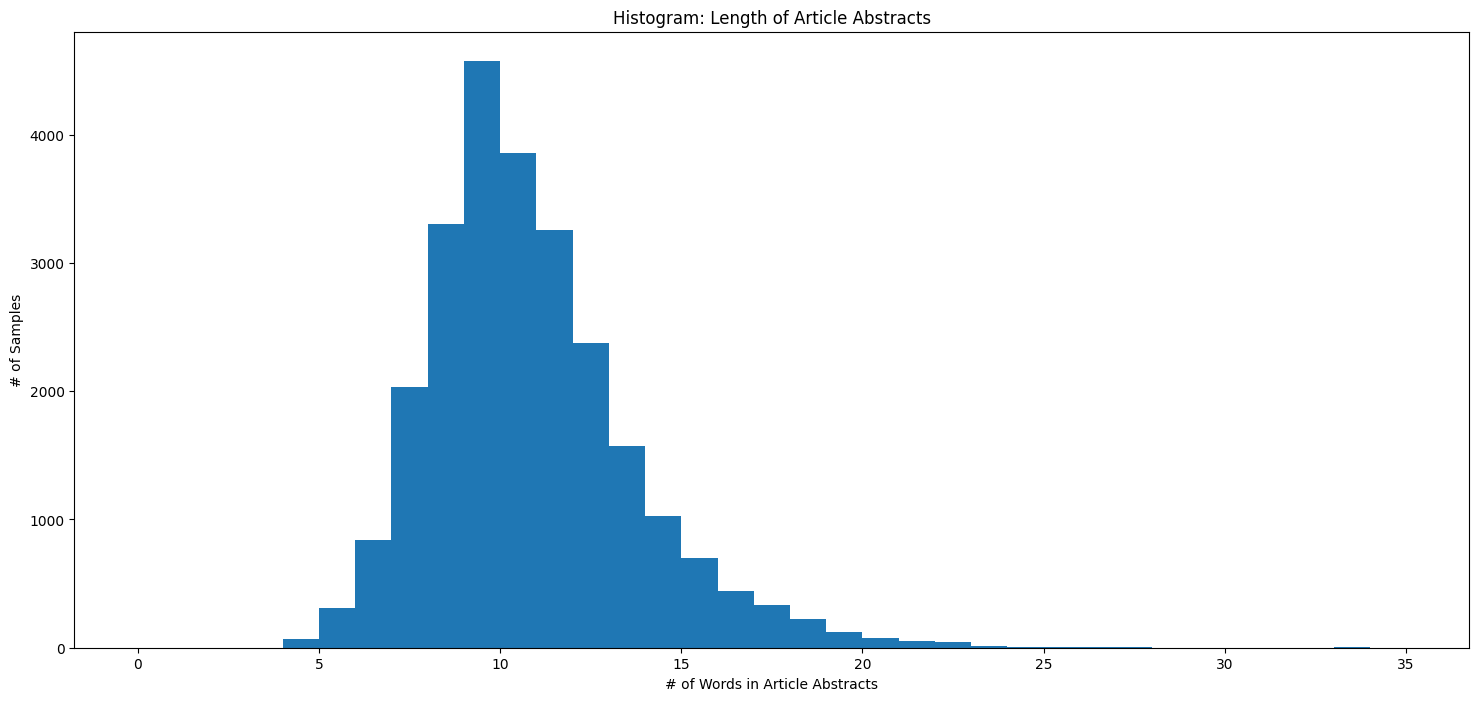

The maximum length of the questions (in words) is 33 words.


In [5]:
train_ds['question_length'] = train_ds['question'].str.split().str.len()

n_bin=35
train_ds.hist('question_length', grid=False, figsize=(18,8), range=(0,n_bin), bins=n_bin)
plt.title('Histogram: Length of Article Abstracts')
plt.xlabel('# of Words in Article Abstracts')
plt.ylabel('# of Samples')
plt.show()

print(f"The maximum length of the questions (in words) is {max(train_ds['question_length'])} words.")
train_ds = train_ds.drop(columns=['question_length'])

#### Convert from DataFrame to Dataset

In [6]:
train_dataset = Dataset.from_pandas(train_ds)
eval_dataset = Dataset.from_pandas(eval_ds)

#### Assign Training & Validation Datasets to DatasetDict

In [7]:
ds = DatasetDict({
    'train' : train_dataset,
    'eval' : eval_dataset,
})

print("Training Dataset Shape:", ds['train'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)

print(ds['train'].features)

Training Dataset Shape: (25262, 7)
Evaluation Dataset Shape: (2985, 7)
{'context': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), 'answer0': Value(dtype='string', id=None), 'answer1': Value(dtype='string', id=None), 'answer2': Value(dtype='string', id=None), 'answer3': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None)}


#### Create Function to Display an Example Sample

In [8]:
def show_one_example(sample):
    print(f"Context: {sample['context']} {sample['question']}")
    print(f" 0 - {sample['answer0']}")
    print(f" 1 - {sample['answer1']}")
    print(f" 2 - {sample['answer2']}")
    print(f" 3 - {sample['answer3']}")
    print(f"\nGround Truth: option {sample['label']}")

#### Display an Example Sample

In [9]:
show_one_example(ds['train'][2])

Context: Leaving my shift Thursday day shift I arrived the same time as my partner just after six that evening and before long the radio erupted in dispatch tones . A car fleeing the police has crashed and landed on its roof with four separate people entrapped inside . Our medic unit is dispatched along with multiple other ambulances and Rescue Companies . What may have caused the radio to erupt with dispatch tones ?
 0 - My partner needed a medic unit .
 1 - Someone was running from the ambulances after they got into a wreck .
 2 - None of the above choices .
 3 - Someone was running from the cops and got into a wreck .

Ground Truth: option 3


#### Basic Values/Constants

In [10]:
MODEL_CKPT = "bert-base-uncased"
MODEL_NAME = MODEL_CKPT.split("/")[-1] + "-Cosmos_QA"

STRATEGY = "epoch"
LEARNING_RATE = 5e-5

BATCH_SIZE = 16
NUM_OF_EPOCHS = 3

WEIGHT_DECAY = 0.01
REPORTS_TO = "tensorboard"

set_seed = 42

#### Instantiate Tokenizer

In [11]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT, use_fast=True)

#### Create Preprocessing Function

In [12]:
ending_names = ["answer0", "answer1", "answer2", "answer3"]

def preprocess_function(samples):
    first_sentences = [[context] * len(ending_names) for context in samples['context']]
    
    question_headers = samples['question']
    second_sentences = [[f"{header} {samples[end][i]}" for end in ending_names] for i, header in enumerate(question_headers)]
    
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    tokenized_samples = tokenizer(first_sentences, second_sentences, truncation=True)
    return {k: [v[i:i + len(ending_names)] for i in range(0, len(v), len(ending_names))] for k, v in tokenized_samples.items()}

#### Apply Preprocessing Function to Dataset

In [13]:
encoded_ds = ds.map(preprocess_function, batched=True)

  0%|          | 0/26 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [14]:
encoded_ds['train'].features

{'context': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'answer0': Value(dtype='string', id=None),
 'answer1': Value(dtype='string', id=None),
 'answer2': Value(dtype='string', id=None),
 'answer3': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None)}

#### Instantiate Model

In [15]:
model = AutoModelForMultipleChoice.from_pretrained(MODEL_CKPT)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly

#### Define TrainingArguments

In [16]:
args = TrainingArguments(
    output_dir=MODEL_NAME,
    evaluation_strategy=STRATEGY,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_OF_EPOCHS,
    weight_decay=WEIGHT_DECAY,
    report_to=REPORTS_TO,
    logging_first_step=True,
    hub_private_repo=True,
    push_to_hub=True
)

#### Define Data Collator Class

In [17]:
@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad inputs 
    for the multiple choices received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    
    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} 
                               for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Unflatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

#### Create Function to Compute Metrics

In [18]:
def compute_metrics(predictions):
    preds, labels = predictions
    preds = np.argmax(preds, axis=1)
    return {"accuracy": (preds == labels).astype(np.float32).mean().item()}

#### Instantiate Trainer

In [19]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["eval"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/DunnBC22/bert-base-uncased-Cosmos_QA into local empty directory.


#### Train Model

In [20]:
train_results = trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: answer1, answer3, context, answer0, answer2, question. If answer1, answer3, context, answer0, answer2, question are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
/Users/leedunn/Documents/nlpnn/nlp/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 25262
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 4737
  Number of trainable parameters = 109483009


  0%|          | 0/4737 [00:00<?, ?it/s]

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'loss': 1.3339, 'learning_rate': 4.998944479628457e-05, 'epoch': 0.0}


Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-500
Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-500/config.json


{'loss': 1.2061, 'learning_rate': 4.472239814228415e-05, 'epoch': 0.32}


Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-500/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-1000


{'loss': 1.0631, 'learning_rate': 3.944479628456829e-05, 'epoch': 0.63}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-1000/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-1000/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-1000/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-1500


{'loss': 0.9734, 'learning_rate': 3.416719442685244e-05, 'epoch': 0.95}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-1500/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-1500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-1500/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: answer1, answer3, context, answer0, answer2, question. If answer1, answer3, context, answer0, answer2, question are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2985
  Batch size = 16


  0%|          | 0/187 [00:00<?, ?it/s]

{'eval_loss': 0.9463162422180176, 'eval_accuracy': 0.6237856149673462, 'eval_runtime': 5178.4001, 'eval_samples_per_second': 0.576, 'eval_steps_per_second': 0.036, 'epoch': 1.0}
{'loss': 0.6396, 'learning_rate': 2.8889592569136586e-05, 'epoch': 1.27}


Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-2000
Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-2000/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-2000/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-2000/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-2000/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-2500


{'loss': 0.5421, 'learning_rate': 2.3611990711420732e-05, 'epoch': 1.58}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-2500/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-2500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-2500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-2500/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-3000


{'loss': 0.5363, 'learning_rate': 1.833438885370488e-05, 'epoch': 1.9}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-3000/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-3000/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-3000/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-3000/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: answer1, answer3, context, answer0, answer2, question. If answer1, answer3, context, answer0, answer2, question are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2985
  Batch size = 16


  0%|          | 0/187 [00:00<?, ?it/s]

{'eval_loss': 1.098717212677002, 'eval_accuracy': 0.6157453656196594, 'eval_runtime': 5215.1053, 'eval_samples_per_second': 0.572, 'eval_steps_per_second': 0.036, 'epoch': 2.0}


Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-3500


{'loss': 0.3025, 'learning_rate': 1.3056786995989024e-05, 'epoch': 2.22}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-3500/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-3500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-3500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-3500/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Adding files tracked by Git LFS: ['.DS_Store']. This may take a bit of time if the files are large.
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-4000


{'loss': 0.1767, 'learning_rate': 7.779185138273169e-06, 'epoch': 2.53}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-4000/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-4000/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-4000/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-4000/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-Cosmos_QA/checkpoint-4500


{'loss': 0.1852, 'learning_rate': 2.501583280557315e-06, 'epoch': 2.85}


Configuration saved in bert-base-uncased-Cosmos_QA/checkpoint-4500/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/checkpoint-4500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/checkpoint-4500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/checkpoint-4500/special_tokens_map.json
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: answer1, answer3, context, answer0, answer2, question. If answer1, answer3, context, answer0, answer2, question are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2985
  Batch size = 16


  0%|          | 0/187 [00:00<?, ?it/s]



Training completed. Do not forget to share your model on huggingface.co/models =)




{'eval_loss': 1.7425875663757324, 'eval_accuracy': 0.6000000238418579, 'eval_runtime': 5131.8614, 'eval_samples_per_second': 0.582, 'eval_steps_per_second': 0.036, 'epoch': 3.0}
{'train_runtime': 676721.6107, 'train_samples_per_second': 0.112, 'train_steps_per_second': 0.007, 'train_loss': 0.6021223496806906, 'epoch': 3.0}


#### Evaluate Model

In [21]:
metrics = trainer.evaluate()

print(metrics)

The following columns in the evaluation set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: answer1, answer3, context, answer0, answer2, question. If answer1, answer3, context, answer0, answer2, question are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2985
  Batch size = 16


  0%|          | 0/187 [00:00<?, ?it/s]

{'eval_loss': 1.7425875663757324, 'eval_accuracy': 0.6000000238418579, 'eval_runtime': 5128.7565, 'eval_samples_per_second': 0.582, 'eval_steps_per_second': 0.036, 'epoch': 3.0}


#### Push to HuggingFace Hub

In [22]:
trainer.push_to_hub()

Saving model checkpoint to bert-base-uncased-Cosmos_QA
Configuration saved in bert-base-uncased-Cosmos_QA/config.json
Model weights saved in bert-base-uncased-Cosmos_QA/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-Cosmos_QA/tokenizer_config.json
Special tokens file saved in bert-base-uncased-Cosmos_QA/special_tokens_map.json


Upload file pytorch_model.bin:   0%|          | 32.0k/418M [00:00<?, ?B/s]

Upload file runs/.DS_Store: 100%|##########| 6.00k/6.00k [00:00<?, ?B/s]

Upload file runs/Mar06_20-39-06_Lees-Air/events.out.tfevents.1678156754.Lees-Air.71037.0: 100%|##########| 6.5…

Upload file runs/Mar06_20-39-06_Lees-Air/events.out.tfevents.1678838605.Lees-Air.71037.2: 100%|##########| 363…

Upload file .DS_Store: 100%|##########| 10.0k/10.0k [00:00<?, ?B/s]

remote: Scanning LFS files of refs/heads/main for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/DunnBC22/bert-base-uncased-Cosmos_QA
   e7a4348..ceb9c55  main -> main

Dropping the following result as it does not have all the necessary fields:
{'metrics': [{'name': 'Accuracy', 'type': 'accuracy', 'value': 0.6000000238418579}]}
To https://huggingface.co/DunnBC22/bert-base-uncased-Cosmos_QA
   ceb9c55..1df8283  main -> main



'https://huggingface.co/DunnBC22/bert-base-uncased-Cosmos_QA/commit/ceb9c55fa94544556c5d6712ba3b9cd87f42299e'

### Notes & Other Takeaways From This Project
****
- It looks like 67.5 percent is the State of the Art value for BERT (the 'Large' BERT checkpoint, not the base checkpoint) on Multiple Choice with the SWAG dataset. Having done some smaller initial test runs and trying this project with distilBERT originally, I am sure that with more training (4 or 5 epochs instead of 3), I could achieve metrics more in line with the State of the Art value. (Same response as the Social IQa project, but for good reason.)
****

#### Citation
- Model Checkpoint
@article{DBLP:journals/corr/abs-1810-04805,
author = {Jacob Devlin and Ming{-}Wei Chang and Kenton Lee and Kristina Toutanova}, title = {{BERT:} Pre-training of Deep Bidirectional Transformers for Language Understanding}, journal = {CoRR}, volume = {abs/1810.04805}, year = {2018}, url = {http://arxiv.org/abs/1810.04805%7D, archivePrefix = {arXiv}, eprint = {1810.04805}, timestamp = {Tue, 30 Oct 2018 20:39:56 +0100}, biburl = {https://dblp.org/rec/journals/corr/abs-1810-04805.bib%7D, bibsource = {dblp computer science bibliography, https://dblp.org%7D
}